# Analyse du jeu de données

In [2]:
import os
import pandas as pd
import s3fs
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [3]:
#Récupération du jeu de données afin d'effectuer des analyses
df = pd.read_csv("train.csv")
df

,text,label,src
0,White girls very rarely date Asian men. Even i...,1,cmv_human
1,I am a 23 year old male Indian American male. ...,1,cmv_human
2,"Take three people, Persons A, B, and C. They l...",1,cmv_human
3,(A) Work part-time in high school; Then go to ...,1,cmv_human
4,When police introduce a new form of speed prev...,1,cmv_human
...,...,...,...
319066,Noisy Intermediate-Scale Quantum (NISQ) machin...,1,sci_gen_human
319067,Recent years have seen rising needs for locati...,1,sci_gen_human
319068,The ongoing neural revolution in machine trans...,1,sci_gen_human
319069,Let D be a set of n pairwise disjoint unit dis...,1,sci_gen_human


In [4]:
# Le nombre de sortie attendue possible
df["label"].unique()

array([1, 0])

In [5]:
# Les données générées par des humains
df[df["label"] == 1]

,text,label,src
0,White girls very rarely date Asian men. Even i...,1,cmv_human
1,I am a 23 year old male Indian American male. ...,1,cmv_human
2,"Take three people, Persons A, B, and C. They l...",1,cmv_human
3,(A) Work part-time in high school; Then go to ...,1,cmv_human
4,When police introduce a new form of speed prev...,1,cmv_human
...,...,...,...
319066,Noisy Intermediate-Scale Quantum (NISQ) machin...,1,sci_gen_human
319067,Recent years have seen rising needs for locati...,1,sci_gen_human
319068,The ongoing neural revolution in machine trans...,1,sci_gen_human
319069,Let D be a set of n pairwise disjoint unit dis...,1,sci_gen_human


In [6]:
# Les données générées par une intelligence artificielle
df[df["label"] == 0]

,text,label,src
7165,White girls very rarely date Asian men. Even i...,0,cmv_machine_continuation_t0_11b
7166,I am a 23 year old male Indian American male. ...,0,cmv_machine_continuation_t0_11b
7167,"Take three people, Persons A, B, and C. They l...",0,cmv_machine_continuation_t0_11b
7168,(A) Work part-time in high school; Then go to ...,0,cmv_machine_continuation_t0_11b
7169,When police introduce a new form of speed prev...,0,cmv_machine_continuation_t0_11b
...,...,...,...
232913,Bring Your Own Device (BYOD) has become the ne...,0,sci_gen_machine_continuation_opt_2.7b
232914,Function inversion is the problem that given a...,0,sci_gen_machine_continuation_opt_2.7b
232915,"Many sensors, such as range, sonar, radar, GPS...",0,sci_gen_machine_continuation_opt_2.7b
232916,This paper introduces the variational Renyi bo...,0,sci_gen_machine_continuation_opt_2.7b


## Liste des analyses effectuées:
 1. Graphique (pie chart) qui montre le nombre de réponses par source 

 2. Graphique (bar chart) qui montre le pourcentage de réponses humaines et non humaines

 3. Graphique (bar chart) qui montre le nombre moyen de mots par humain et AI 

 4. Étude de la corrélation entre le label et la source 
 
 5. Nuage de mots pour les textes générés par des humains et l'intelligence artificielle pour visualiser
     les mots les plus fréquents pour chaque catégorie

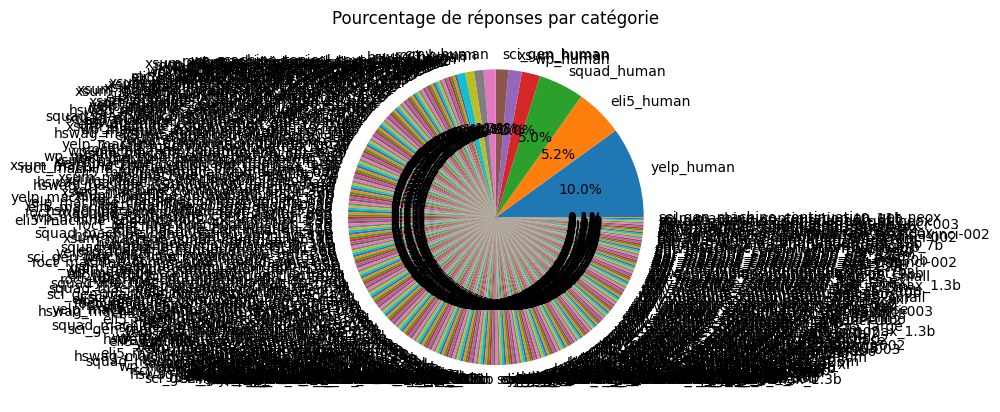

In [7]:
# Graphique (pie chart) qui montre le nombre de réponses par source
# Il y a beaucoup de sources avec peu de données, ce qui rend le graphique illisible
count_per_src = df['src'].value_counts()

percentage_per_src = count_per_src / count_per_src.sum() * 100

plt.pie(percentage_per_src, labels=percentage_per_src.index, autopct='%1.1f%%')
plt.title('Pourcentage de réponses par catégorie')
plt.show()

In [8]:
human_sources = [
    'cmv_human', 'squad_human', 'tldr_human', 'sci_gen_human', 'yelp_human',
    'wp_human', 'eli5_human', 'roct_human', 'xsum_human', 'hswag_human'
]

df['source_graphique'] = df['src'].apply(lambda x: x if x in human_sources else 'autre_source')
df

,text,label,src,source_graphique
0,White girls very rarely date Asian men. Even i...,1,cmv_human,cmv_human
1,I am a 23 year old male Indian American male. ...,1,cmv_human,cmv_human
2,"Take three people, Persons A, B, and C. They l...",1,cmv_human,cmv_human
3,(A) Work part-time in high school; Then go to ...,1,cmv_human,cmv_human
4,When police introduce a new form of speed prev...,1,cmv_human,cmv_human
...,...,...,...,...
319066,Noisy Intermediate-Scale Quantum (NISQ) machin...,1,sci_gen_human,sci_gen_human
319067,Recent years have seen rising needs for locati...,1,sci_gen_human,sci_gen_human
319068,The ongoing neural revolution in machine trans...,1,sci_gen_human,sci_gen_human
319069,Let D be a set of n pairwise disjoint unit dis...,1,sci_gen_human,sci_gen_human


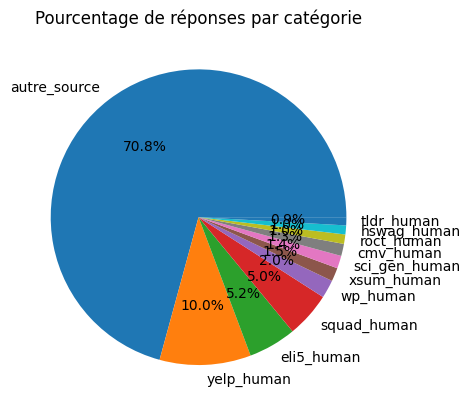

In [9]:
# On reproduit le même graphique (en les groupant)
count_per_src_graphique = df['source_graphique'].value_counts()

percentage_per_src_graphique = count_per_src_graphique / count_per_src_graphique.sum() * 100

plt.pie(percentage_per_src_graphique, labels=percentage_per_src_graphique.index, autopct='%1.1f%%')
plt.title('Pourcentage de réponses par catégorie')
plt.show()

/tmp/ipykernel_6671/220809761.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["IA", "Humain"], y=count_per_label.values, palette='coolwarm', errorbar=None, width=0.5)


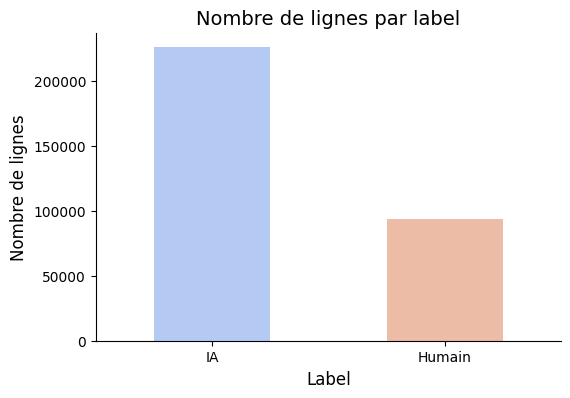

In [10]:
# Graphique (bar chart) qui montre le pourcentage de réponses humaines et non humaines:
# 1 c'est humain et 0 c'est IA

count_per_label = df['label'].value_counts()

plt.figure(figsize=(6, 4))  
sns.barplot(x=["IA", "Humain"], y=count_per_label.values, palette='coolwarm', errorbar=None, width=0.5)  
plt.xlabel('Label', fontsize=12)  
plt.ylabel('Nombre de lignes', fontsize=12)  
plt.title('Nombre de lignes par label', fontsize=14) 

sns.despine() 
plt.show()

In [11]:
# Graphique (bar chart) qui montre le nombre moyen de mots par humain et AI:
# Rajout d'une colonne avec le nombre de mots dans la colonne 'text' 

df['number_words'] = df['text'].apply(lambda x: len(x.split()))
df

,text,label,src,source_graphique,number_words
0,White girls very rarely date Asian men. Even i...,1,cmv_human,cmv_human,222
1,I am a 23 year old male Indian American male. ...,1,cmv_human,cmv_human,265
2,"Take three people, Persons A, B, and C. They l...",1,cmv_human,cmv_human,303
3,(A) Work part-time in high school; Then go to ...,1,cmv_human,cmv_human,405
4,When police introduce a new form of speed prev...,1,cmv_human,cmv_human,212
...,...,...,...,...,...
319066,Noisy Intermediate-Scale Quantum (NISQ) machin...,1,sci_gen_human,sci_gen_human,244
319067,Recent years have seen rising needs for locati...,1,sci_gen_human,sci_gen_human,226
319068,The ongoing neural revolution in machine trans...,1,sci_gen_human,sci_gen_human,134
319069,Let D be a set of n pairwise disjoint unit dis...,1,sci_gen_human,sci_gen_human,120


/tmp/ipykernel_6671/3792973628.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["IA","Humain"], y=mean_word_count_per_label.values, palette='viridis', errorbar=None, width=0.5)


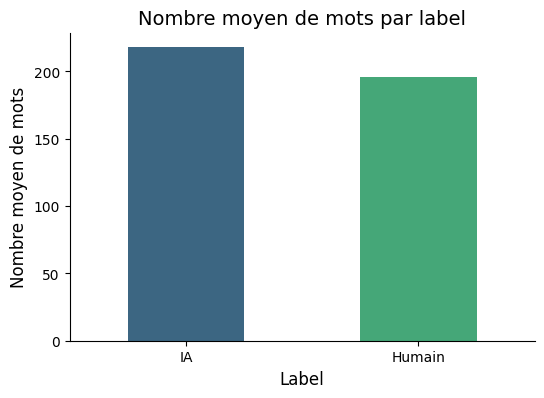

In [12]:
# Bar chart nombre de mots moyen pour humain et AI

mean_word_count_per_label = df.groupby('label')['number_words'].mean()

plt.figure(figsize=(6, 4)) 
sns.barplot(x=["IA","Humain"], y=mean_word_count_per_label.values, palette='viridis', errorbar=None, width=0.5)

plt.xlabel('Label', fontsize=12)  
plt.ylabel('Nombre moyen de mots', fontsize=12)  
plt.title('Nombre moyen de mots par label', fontsize=14)  

sns.despine()
plt.show()

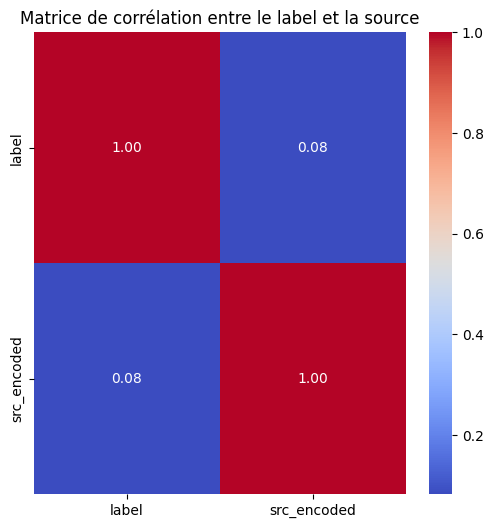

In [13]:
# Étude de la corrélation entre le label et la source :

le = LabelEncoder()
df['src_encoded'] = le.fit_transform(df['src'])

correlation_matrix = df[['label', 'src_encoded']].corr()


plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Matrice de corrélation entre le label et la source')
plt.show()

In [16]:
#!pip install wordcloud

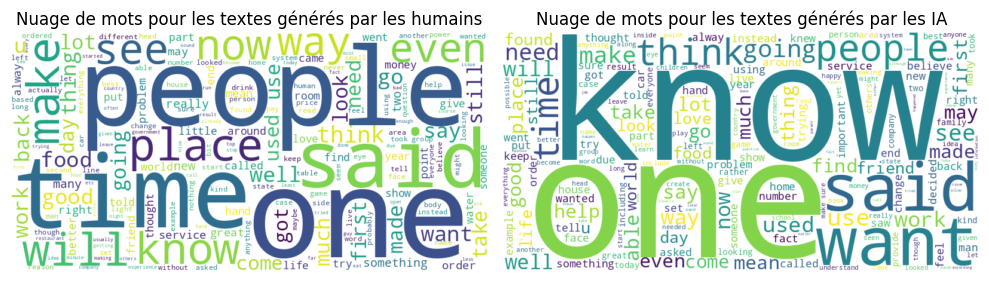

In [15]:
# Nuage de mots pour les textes générés:
from collections import Counter
from wordcloud import WordCloud

human_texts = ' '.join(df[df['label'] == 1]['text']) 
ai_texts = ' '.join(df[df['label'] == 0]['text'])  

human_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(human_texts)
ai_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ai_texts)

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(human_wordcloud, interpolation='bilinear')
plt.title('Nuage de mots pour les textes générés par les humains')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(ai_wordcloud, interpolation='bilinear')
plt.title('Nuage de mots pour les textes générés par les IA')
plt.axis("off")

plt.tight_layout()
plt.show()